# Read CSV

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the data files and processing the file in chunks
loan_data = pd.read_csv('loan.csv', low_memory=False)


# Displaying the first few rows of each file to understand the structure
loan_data_head = loan_data.head()


loan_data_head


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


# Univariate Analysis

Loan Amount Metrics:
 count    14526.00
mean     12415.46
std       8417.62
min       1000.00
25%       6000.00
50%      10000.00
75%      16200.00
max      35000.00
Name: loan_amnt, dtype: float64


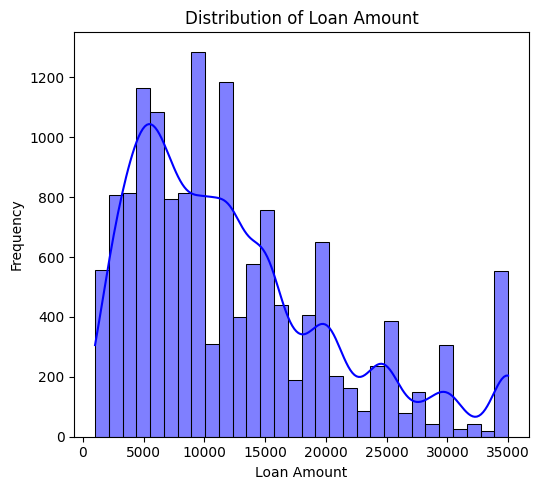

In [3]:
# Calculating metrics for loan amount distribution
loan_amount_metrics = loan_data['loan_amnt'].describe().round(2)
print("Loan Amount Metrics:\n", loan_amount_metrics)

# Univariate Analysis: Distribution of loan amount
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.histplot(loan_data['loan_amnt'], bins=30, kde=True, color='blue')
plt.title('Distribution of Loan Amount')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


Interest Rate Metrics:
 count    14526.00
mean        12.39
std          4.23
min          5.42
25%          8.90
50%         11.99
75%         15.27
max         24.59
Name: int_rate, dtype: float64


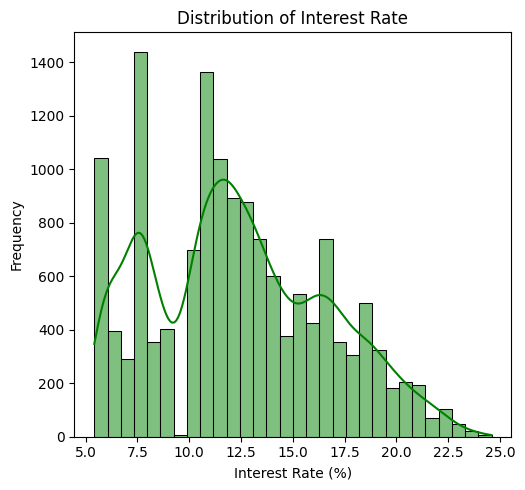

In [4]:
# Converting 'int_rate' to numeric for analysis
loan_data['int_rate'] = loan_data['int_rate'].str.rstrip('%').astype('float')

# Calculating metrics for interest rate distribution
interest_rate_metrics = loan_data['int_rate'].describe().round(2)
print("\nInterest Rate Metrics:\n", interest_rate_metrics)

# Univariate Analysis: Distribution of interest rate
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 2)
sns.histplot(loan_data['int_rate'], bins=30, kde=True, color='green')
plt.title('Distribution of Interest Rate')
plt.xlabel('Interest Rate (%)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

The distribution of loan statuses:
loan_status
Fully Paid     11241
Charged Off     2221
Current         1064
Name: count, dtype: int64


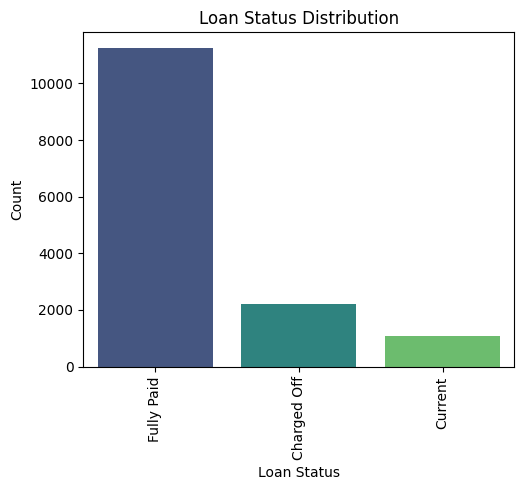

In [5]:
# The distribution of loan statuses
loan_status_counts = loan_data['loan_status'].value_counts()
print("The distribution of loan statuses:")
print(loan_status_counts)

# Univariate Analysis: Distribution of loan status
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 3)
loan_status_counts = loan_data['loan_status'].value_counts()
sns.barplot(x=loan_status_counts.index, y=loan_status_counts.values, hue=loan_status_counts.index, palette='viridis', legend=False)
plt.title('Loan Status Distribution')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Segmented Univariate Analysis

Descriptive Statistics for Loan Amount by Loan Status:
               count      mean      std     min      25%      50%       75%  \
loan_status                                                                   
Charged Off   2221.0  13525.70  8960.05  1000.0   6000.0  12000.0  18825.00   
Current       1064.0  17341.61  8597.98  1000.0  12000.0  16000.0  23756.25   
Fully Paid   11241.0  11729.81  8105.93  1000.0   5600.0  10000.0  15000.00   

                 max  
loan_status           
Charged Off  35000.0  
Current      35000.0  
Fully Paid   35000.0  


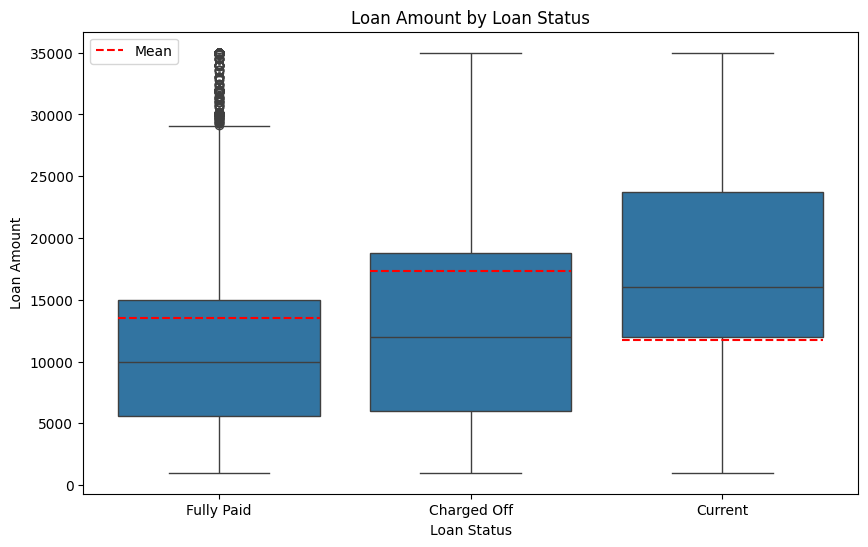

In [6]:
# Descriptive Statistics for Loan Amount by Loan Status
loan_amount_by_status = loan_data.groupby('loan_status')['loan_amnt'].describe().round(2)
print("Descriptive Statistics for Loan Amount by Loan Status:")
print(loan_amount_by_status)

# Segmented Univariate Analysis: Loan Amount by Loan Status
plt.figure(figsize=(10, 6))
sns.boxplot(x='loan_status', y='loan_amnt', data=loan_data)

# Calculate the mean for each loan_status group
means = loan_data.groupby('loan_status')['loan_amnt'].mean()

# Add the means as a dotted line on the boxplot
for i, mean in enumerate(means):
    plt.plot([i-0.4, i+0.4], [mean, mean], linestyle='--', color='red', label='Mean' if i == 0 else "")


plt.title('Loan Amount by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Loan Amount')
# Adding the legend
plt.legend()
plt.show()

Descriptive Statistics for Interest Rate by Loan Status
               count   mean   std   min    25%    50%    75%    max
loan_status                                                        
Charged Off   2221.0  14.56  4.16  5.42  11.71  14.65  17.58  24.40
Current       1064.0  15.06  3.59  7.49  11.99  14.65  17.99  24.59
Fully Paid   11241.0  11.71  4.05  5.42   7.90  11.49  14.27  24.11


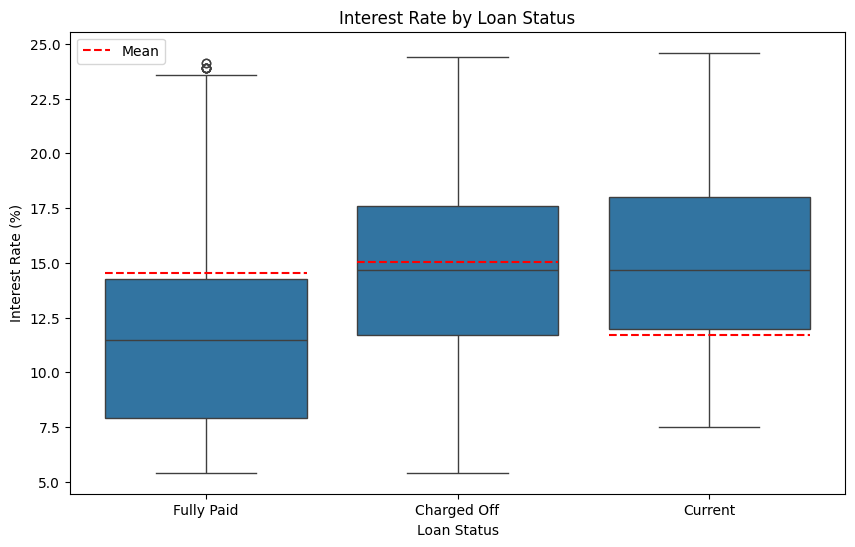

In [7]:
# Descriptive Statistics for Interest Rate by Loan Status
interest_rate_by_status = loan_data.groupby('loan_status')['int_rate'].describe().round(2)
print("Descriptive Statistics for Interest Rate by Loan Status")
print(interest_rate_by_status)

# Segmented Univariate Analysis: Interest Rate by Loan Status
plt.figure(figsize=(10, 6))
sns.boxplot(x='loan_status', y='int_rate', data=loan_data)

# Calculate the mean interest rate for each loan_status group
means = loan_data.groupby('loan_status')['int_rate'].mean()

# Add the means as a dotted line on the boxplot
for i, mean in enumerate(means):
    plt.plot([i-0.4, i+0.4], [mean, mean], linestyle='--', color='red', label='Mean' if i == 0 else "")


plt.title('Interest Rate by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Interest Rate (%)')

# Adding the legend
plt.legend()
plt.show()

# Bivariate Analysis


Loan Term vs Loan Status Counts:
loan_status  Charged Off  Current  Fully Paid
term                                         
 36 months          3227        0       25869
 60 months          2400     1140        7081


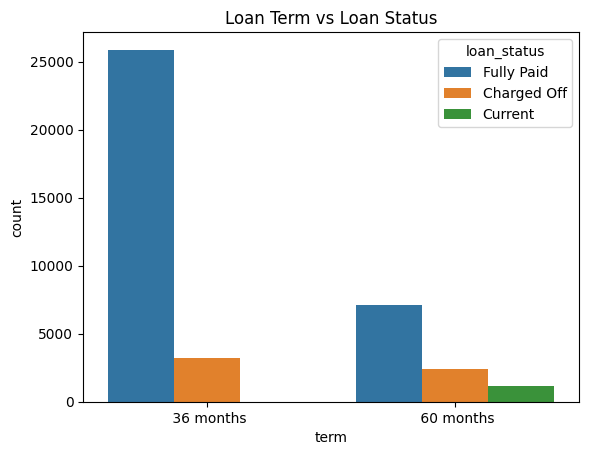

In [ ]:
# Bivariate Analysis: Loan Term vs Loan Status
# Filling any missing values with zero and converting the counts to integers
term_stats = loan_data.groupby(['term', 'loan_status']).size().unstack().fillna(0).astype(int)
print("\nLoan Term vs Loan Status Counts:")
print(term_stats)

# Plotting the count plot for Bivariate Analysis: Loan Term vs Loan Status
sns.countplot(x='term', hue='loan_status', data=loan_data)
plt.title('Loan Term vs Loan Status')
plt.show()


Annual Income Descriptive Statistics by Loan Status:
               count      mean       std     min      25%      50%      75%  \
loan_status                                                                   
Charged Off   2221.0  62945.63  46185.96  9600.0  39000.0  54000.0  75000.0   
Current       1064.0  75387.44  45218.68  9960.0  48000.0  65000.0  90000.0   
Fully Paid   11241.0  71073.76  48758.29  6000.0  42996.0  60000.0  85000.0   

                   max  
loan_status             
Charged Off  1250000.0  
Current       650000.0  
Fully Paid   1782000.0  


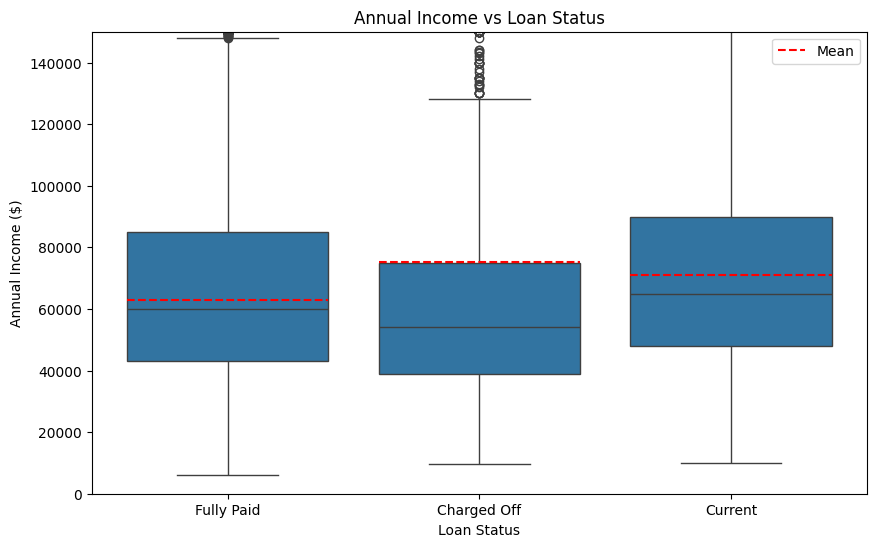

In [8]:
# Bivariate Analysis: Annual Income vs Loan Status

# Calculate descriptive statistics for annual income segmented by loan status
annual_inc_stats = loan_data.groupby('loan_status')['annual_inc'].describe().round(2)
print("\nAnnual Income Descriptive Statistics by Loan Status:")
print(annual_inc_stats)


# Plotting the boxplot for Annual Income vs Loan Status
plt.figure(figsize=(10, 6))
sns.boxplot(x='loan_status', y='annual_inc', data=loan_data)

# Calculate the mean annual income for each loan_status group
means = loan_data.groupby('loan_status')['annual_inc'].mean()

# Add the means as a dotted line on the boxplot
for i, mean in enumerate(means):
    plt.plot([i-0.4, i+0.4], [mean, mean], linestyle='--', color='red', label='Mean' if i == 0 else "")


plt.title('Annual Income vs Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Annual Income ($)')
plt.ylim(0, 150000)  # Limiting the y-axis for better visualization

# Adding the legend
plt.legend()

plt.show()



Grade vs Loan Status Counts:
loan_status  Charged Off  Current  Fully Paid
grade                                        
A                    602       40        9443
B                   1425      345       10250
C                   1347      264        6487
D                   1118      222        3967
E                    715      179        1948
F                    319       73         657
G                    101       17         198


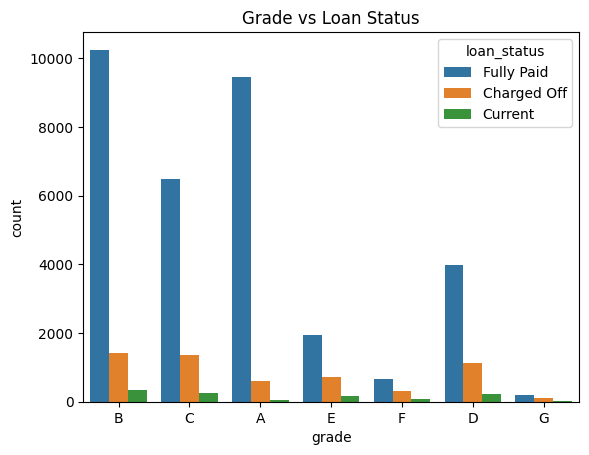

In [ ]:
# Grade vs Loan Status

# Missing values filled in as zero and counts converted to integers
# Descriptive Statistics for Grade vs Loan Status
grade_stats = loan_data.groupby(['grade', 'loan_status']).size().unstack().fillna(0).astype(int)
print("\nGrade vs Loan Status Counts:")
print(grade_stats)

# Grade vs Loan Status plot
sns.countplot(x='grade', hue='loan_status', data=loan_data)
plt.title('Grade vs Loan Status')
plt.show()

descriptive statistics for Debt-to-Income Ratio grouped by Loan Status:
               count   mean   std  min   25%    50%    75%    max
loan_status                                                      
Charged Off   2221.0  14.68  6.48  0.0  9.90  14.90  19.89  29.85
Current       1064.0  14.82  6.67  0.0  9.85  15.14  20.02  29.83
Fully Paid   11241.0  13.70  6.73  0.0  8.48  13.73  18.95  29.99


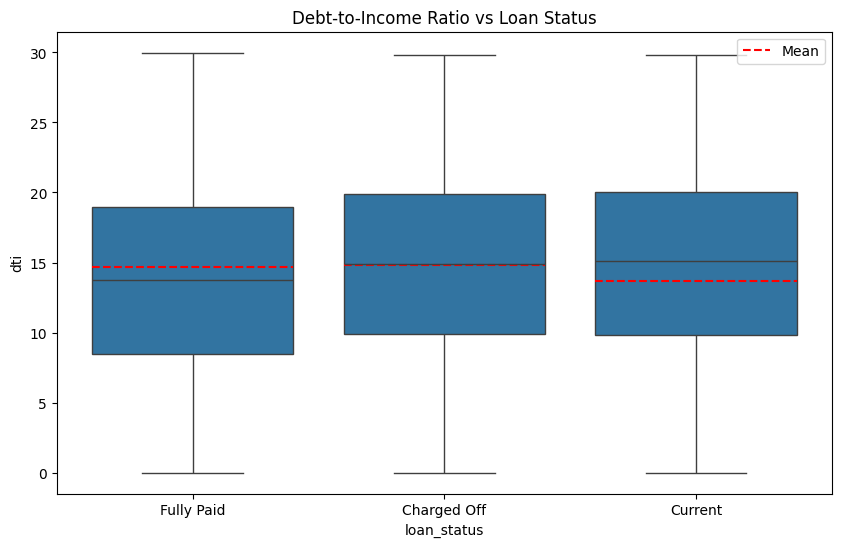

In [10]:
# Debt-to-Income Ratio vs Loan Status
# Print descriptive statistics for Debt-to-Income Ratio grouped by Loan Status
print("descriptive statistics for Debt-to-Income Ratio grouped by Loan Status:")
print(loan_data.groupby('loan_status')['dti'].describe().round(2))

# Debt-to-Income Ratio vs Loan Status plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='loan_status', y='dti', data=loan_data)

# Calculate the mean DTI for each loan_status group
means = loan_data.groupby('loan_status')['dti'].mean()

# Add the means as a dotted line on the boxplot
for i, mean in enumerate(means):
    plt.plot([i-0.4, i+0.4], [mean, mean], linestyle='--', color='red', label='Mean' if i == 0 else "")


plt.title('Debt-to-Income Ratio vs Loan Status')

# Adding the legend
plt.legend()

plt.show()


Employment Length vs Loan Status Counts:
loan_status  Charged Off  Current  Fully Paid
emp_length                                   
< 1 year             212       67        1037
1 year               173       63         813
2 years              197       90        1124
3 years              198       79        1072
4 years              164       85         979
5 years              185       84         983
6 years              150       58         761
7 years              105       58         572
8 years               84       41         425
9 years               50       31         363
10+ years            594      367        2742


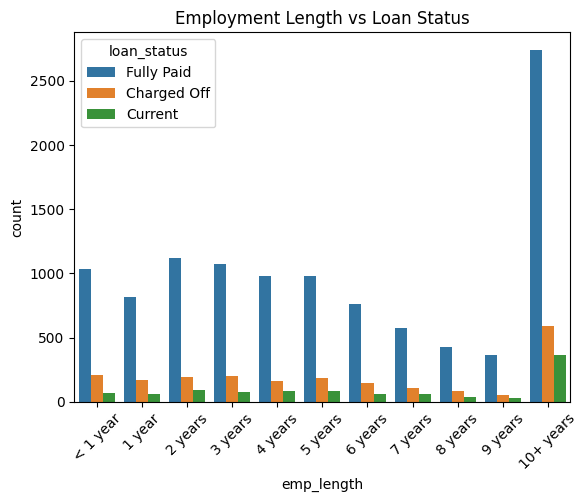

In [16]:
# Employment Length vs Loan Status
# Define the order of the categories
emp_length_order = [
    '< 1 year', '1 year', '2 years', '3 years', '4 years',
    '5 years', '6 years', '7 years', '8 years', '9 years', '10+ years'
]

# Convert 'emp_length' to a categorical type with the specified order
loan_data['emp_length'] = pd.Categorical(loan_data['emp_length'], categories=emp_length_order, ordered=True)

# Print descriptive statistics for Employment Length grouped by Loan Status
# Missing values filled in as zero and counts converted to integers
emp_length_stats = loan_data.groupby(['emp_length', 'loan_status'], observed=False).size().unstack().fillna(0).astype(int)
print("\nEmployment Length vs Loan Status Counts:")
print(emp_length_stats)


# Employment Length vs Loan Status plot
sns.countplot(x='emp_length', hue='loan_status', data=loan_data)
plt.title('Employment Length vs Loan Status')
plt.xticks(rotation=45)
plt.show()


Home Ownership vs Loan Status Counts:
loan_status     Charged Off  Current  Fully Paid
home_ownership                                  
MORTGAGE               2327      638       14694
OTHER                    18        0          80
OWN                     443       83        2532
RENT                   2839      419       15641


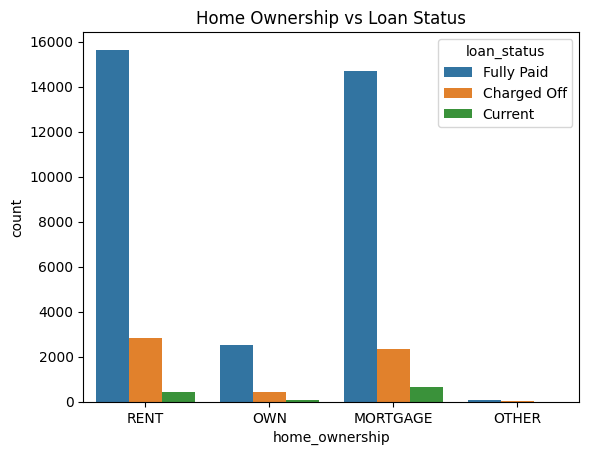

In [ ]:
# Home Ownership vs Loan Status
# Print descriptive statistics for Home Ownership grouped by Loan Status

# Filter out 'NONE' home ownership status
filtered_loan_data = loan_data[loan_data['home_ownership'] != 'NONE']

# Missing values filled as zero and counts converted to integers
home_ownership_stats = filtered_loan_data.groupby(['home_ownership', 'loan_status']).size().unstack().fillna(0).astype(int)
print("\nHome Ownership vs Loan Status Counts:")
print(home_ownership_stats)

# Home Ownership vs Loan Status plot
sns.countplot(x='home_ownership', hue='loan_status', data=filtered_loan_data)
plt.title('Home Ownership vs Loan Status')
plt.show()


Purpose vs Loan Status Counts:
loan_status         Charged Off  Current  Fully Paid
purpose                                             
car                         160       50        1339
credit_card                 542      103        4485
debt_consolidation         2767      586       15288
educational                  56        0         269
home_improvement            347      101        2528
house                        59       14         308
major_purchase              222       37        1928
medical                     106       12         575
moving                       92        7         484
other                       633      128        3232
renewable_energy             19        1          83
small_business              475       74        1279
vacation                     53        6         322
wedding                      96       21         830


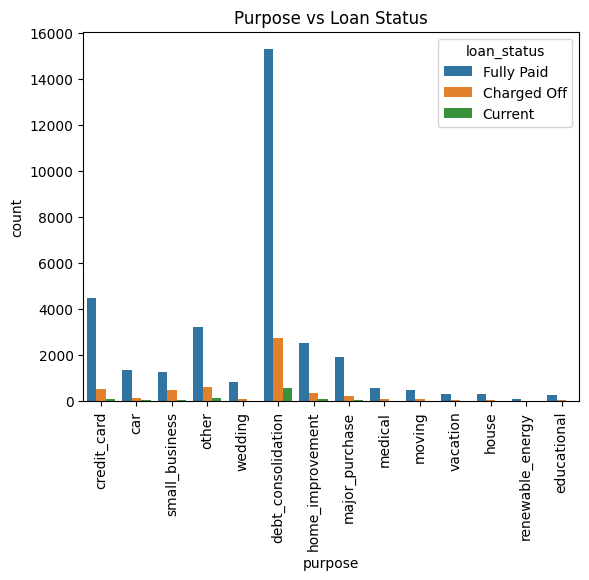

In [ ]:
# Purpose vs Loan Status
# Print descriptive statistics for Purpose grouped by Loan Status
# Missing values filled as zero and counts converted to integers
purpose_stats = loan_data.groupby(['purpose', 'loan_status']).size().unstack().fillna(0).astype(int)
print("\nPurpose vs Loan Status Counts:")
print(purpose_stats)


# Purpose vs Loan Status plot
sns.countplot(x='purpose', hue='loan_status', data=loan_data)
plt.title('Purpose vs Loan Status')
plt.xticks(rotation=90)
plt.show()